In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [230]:
df = pd.read_csv(r'c:\Users\Lucas\Downloads\Dados\pnadc2015_v2.csv')

In [231]:
df.head(3)

,Ano,Trimestre,UF,UPA,Estrato,V1008,V1014,V1030,V1031,V1032,...,V1032197,V1032198,V1032199,V1032200,ID_DOMICILIO,CO1,CO1e,CO2,CO2e,CO3
0,2015,2,Rondônia,110000016,1110011,1,4,488676,123.460822,157.005749,...,339.635481,0.0,149.043646,158.522347,1100000160104,1.00602,1.015296,1.521805,1.535838,1.512699
1,2015,2,Rondônia,110000016,1110011,1,4,488676,123.460822,157.005749,...,339.635481,0.0,149.043646,158.522347,1100000160104,1.00602,1.015296,1.521805,1.535838,1.512699
2,2015,2,Rondônia,110000016,1110011,2,4,488676,123.460822,148.861998,...,313.380456,0.0,144.019606,147.073616,1100000160204,1.00602,1.015296,1.521805,1.535838,1.512699


Parte Específica para a extração dos metadados

In [232]:
df_metadados = pd.read_excel(r"c:\Users\Lucas\Downloads\Dicionário de variáveis PNAD.xls",skiprows=3)

In [233]:
df_metadados.columns

Index(['Parte 1 - Identificação e Controle', 'Unnamed: 1', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8'],
      dtype='object')

Tratamento sobre os metadados

In [234]:
df_metadados2 = df_metadados.iloc[:,[2,4,5,6]]

In [235]:
df_metadados.head(3)

,Parte 1 - Identificação e Controle,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,1,4.0,Ano,NaN,Ano de referência,NaN,NaN,1º tri/2019 - 4º tri/2019,x
1,5,1.0,Trimestre,NaN,Trimestre de referência,1 a 4,Número do trimestre (1 a 4),1º tri/2019 - 4º tri/2019,x
2,6,2.0,UF,NaN,Unidade da Federação,11,Rondônia,1º tri/2019 - 4º tri/2019,x


In [236]:
df_metadados3 = df_metadados2.rename(columns={"Unnamed: 2":"codigo_da_variavel","Unnamed: 4":"descricao","Unnamed: 5":"tipo","Unnamed: 6":"descricao_tipo"})

In [237]:
df_metadados3.head(3)

,codigo_da_variavel,descricao,tipo,descricao_tipo
0,Ano,Ano de referência,NaN,NaN
1,Trimestre,Trimestre de referência,1 a 4,Número do trimestre (1 a 4)
2,UF,Unidade da Federação,11,Rondônia


Extração das colunas desejadas para o estudo

In [238]:
df_metadados4 = df_metadados3[df_metadados3["codigo_da_variavel"].isin(["UF","V2007","V2009","V2010","VD3005","V5004A2","V403312"])]

In [239]:
df_metadados4.head(3)

,codigo_da_variavel,descricao,tipo,descricao_tipo
2,UF,Unidade da Federação,11,Rondônia
3,UF,Unidade da Federação,12,Acre
4,UF,Unidade da Federação,13,Amazonas


Parte específica para renomear as colunas do dataframe inicial a partir da df_metadados4

In [240]:
# Separação das variáveis
filtro_colunas = df_metadados4["codigo_da_variavel"].unique()

# Filtro sobre o dataframe inicial
df_2 = df[filtro_colunas]

In [241]:
# Dicionário com os nomes das colunas a renomar a partir do df_metadados4
dicionario = dict(zip(df_metadados4["codigo_da_variavel"],df_metadados4["descricao"]))

In [242]:
dicionario_2 = {"UF":"uf","V2007":"sexo","V2009":"idade","V2010":"cor","VD3005":"anos_de_estudo","V5004A2":"valor_benef_pensao_previdencia","V403312":"rendimento_bruto"}

In [243]:
# Tabela Após os filtros
df_3 = df_2.rename(columns=dicionario_2)

In [244]:
df_3.head(3)

,uf,sexo,idade,cor,rendimento_bruto,valor_benef_pensao_previdencia,anos_de_estudo
0,Rondônia,Feminino,38,Parda,1000.0,NaN,12 anos de estudo
1,Rondônia,Masculino,24,Parda,740.0,NaN,12 anos de estudo
2,Rondônia,Feminino,22,Branca,740.0,NaN,8 anos de estudo


In [245]:
# Remoção de duplicadas - valor é alto de duplicadas por conta da quantidade pequena de colunas sobre a qual foi feito o filtro
df_4 = df_3.drop_duplicates()

In [246]:
df_4 = df_4[df_4["cor"] != "Ignorado"]

In [247]:
df_4["anos_de_estudo"] = df_4["anos_de_estudo"].astype(str)

In [248]:
# Função para limpar os casos de renda 


# Parte voltada ao estudo das hipóteses apresentadas no início

In [249]:
# Importação das bibliotecas

import matplotlib.pyplot as plt
import seaborn as sns

# Aspectos gerais dos dados

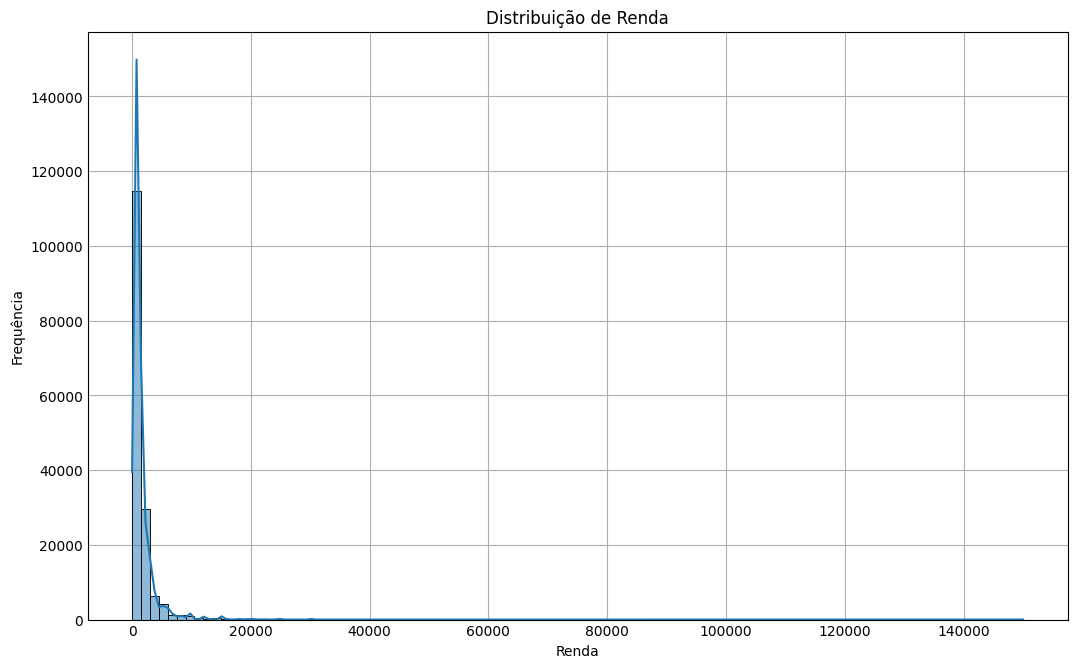

In [250]:
plt.figure(figsize=(10, 6))
sns.histplot(df_4['rendimento_bruto'],kde=True, bins = 100 )
plt.title('Distribuição de Renda')
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [251]:
# Presença de Outlier sobre a variável rendimento_bruto

df_4['rendimento_bruto'].max()

150000.0

In [252]:
len(df_4[df_4['rendimento_bruto'] <= 40000])

159913

In [253]:
len(df_4[df_4['rendimento_bruto'] <= 40000])/ len(df_4)*100

67.24005987621098

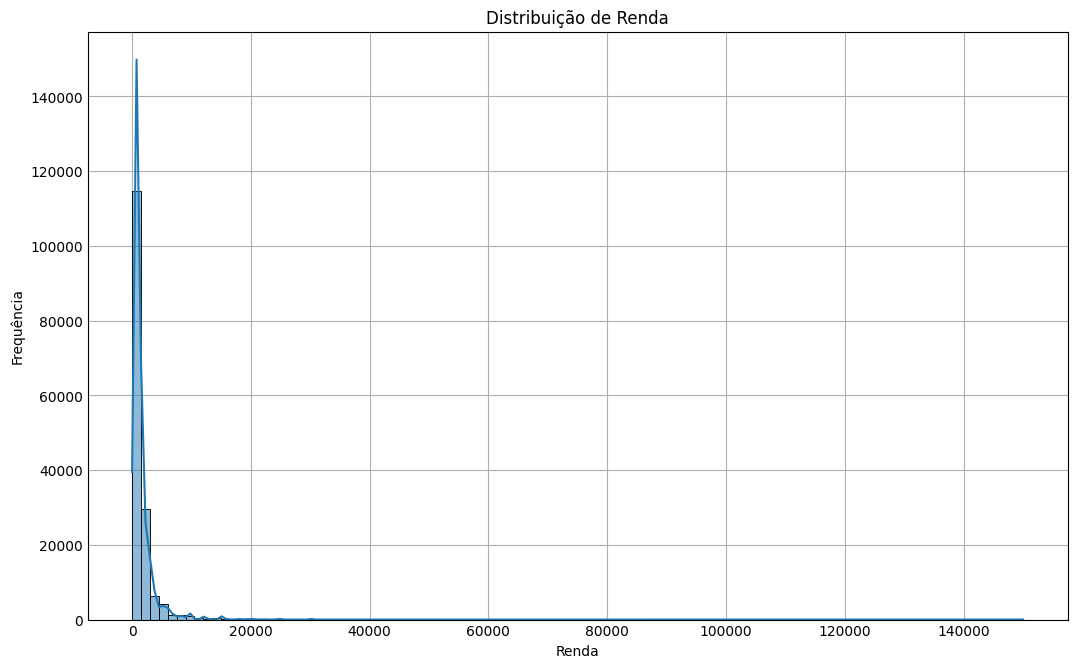

In [254]:
plt.figure(figsize=(10, 6))
sns.histplot(df_4['rendimento_bruto'],kde=True, bins = 100 )
plt.title('Distribuição de Renda')
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [255]:
contagem_renda = df_4['rendimento_bruto'].value_counts()
contagem_renda.idxmax()

788.0

In [256]:
df_4["rendimento_bruto"] =  df_4["rendimento_bruto"].fillna(0)
df_4["valor_benef_pensao_previdencia"] = df_4["valor_benef_pensao_previdencia"].fillna(0)

In [257]:
# Tratamento de dados específicos para a extração de outliers

df_4["renda_total"] = df_4["rendimento_bruto"] + df_4["valor_benef_pensao_previdencia"]

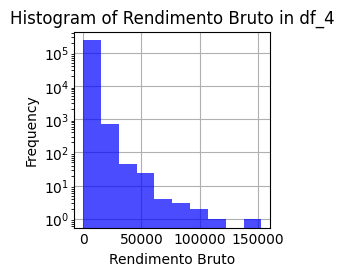

In [258]:
plt.hist(df_4['renda_total'], color='blue', alpha=0.7,log=True)
plt.title('Histogram of Rendimento Bruto in df_4')
plt.xlabel('Rendimento Bruto')
plt.ylabel('Frequency')
plt.show()

In [259]:
df_4 = df_4[df_4["idade"] <= 80]

In [260]:
# extração dos anos de estudo

def extrair_anos_de_estudo(entrada):
    padrao = re.compile(r"(\d{1,2}) anos de estudo")
    extrair = padrao.search(entrada)
    if extrair:
        return extrair.group(1)
    return 0

In [261]:
df_4["anos_de_estudo"] = df_4["anos_de_estudo"].apply(extrair_anos_de_estudo)

In [262]:
df_4 = df_4.replace([np.inf, -np.inf], 0)

In [263]:
df_4["anos_de_estudo"] = df_4["anos_de_estudo"].astype(int)

# Estudo

In [264]:
df_4.columns

Index(['uf', 'sexo', 'idade', 'cor', 'rendimento_bruto',
       'valor_benef_pensao_previdencia', 'anos_de_estudo', 'renda_total'],
      dtype='object')

C:\Users\Lucas\AppData\Local\Temp\ipykernel_21632\2208668172.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_4.pivot_table('rendimento_bruto', index = 'idade',columns = 'cor', aggfunc = sum).plot()


<Axes: xlabel='idade'>

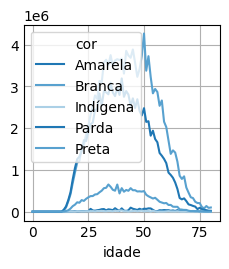

In [265]:
df_4.pivot_table('rendimento_bruto', index = 'idade',columns = 'cor', aggfunc = sum).plot()

In [266]:
df_4.columns

Index(['uf', 'sexo', 'idade', 'cor', 'rendimento_bruto',
       'valor_benef_pensao_previdencia', 'anos_de_estudo', 'renda_total'],
      dtype='object')

C:\Users\Lucas\AppData\Local\Temp\ipykernel_21632\201837782.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_4.pivot_table('rendimento_bruto', index = 'idade',columns = ['cor', 'sexo'], aggfunc = sum).plot()


<Axes: xlabel='idade'>

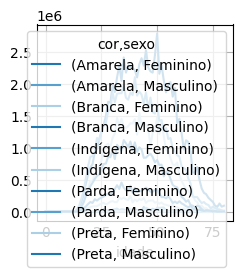

In [267]:
df_4.pivot_table('rendimento_bruto', index = 'idade',columns = ['cor', 'sexo'], aggfunc = sum).plot()

# Renda média por idade e cor/sexo

In [268]:
# Rendimento médio por pessoa e por genero

media_rendimentos = df_4.groupby('sexo')['rendimento_bruto'].mean().round(2)
print(media_rendimentos)

sexo
Feminino      842.31
Masculino    1360.64
Name: rendimento_bruto, dtype: float64


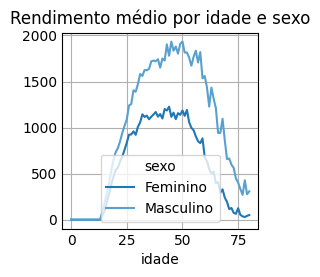

In [269]:
total_redimentos = df_4.pivot_table('rendimento_bruto',index='idade',columns='sexo',aggfunc='mean',fill_value=0).plot(title='Rendimento médio por idade e sexo')

In [270]:
df_4_temp = df_4[df_4['idade'] >= 60] 

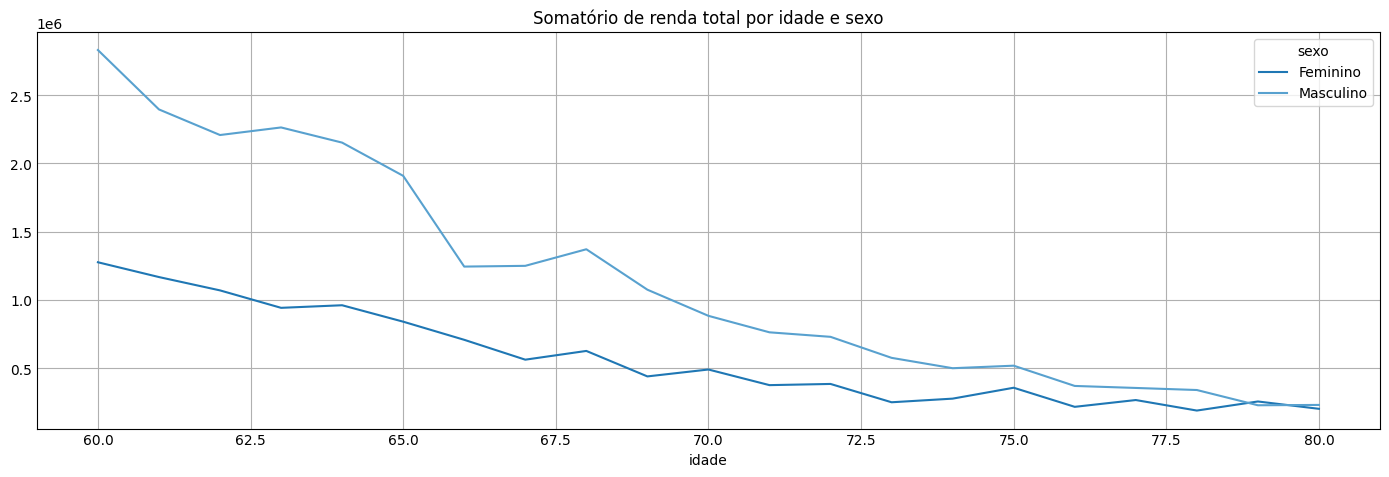

In [271]:
# Cria uma figura
fig, ax = plt.subplots(figsize=(14, 5))

# Plot 1: Tabela pivotada de rendimento médio total por idade e sexo
pivot_table = df_4_temp.pivot_table('renda_total', index='idade', columns='sexo', aggfunc='sum', fill_value=0)
pivot_table.plot(ax=ax, title='Somatório de renda total por idade e sexo')

# Ajusta o layout para evitar sobreposição de títulos
plt.tight_layout()

# Ajusta o título do boxplot (remove o título automático gerado pelo pandas)
plt.suptitle('')
plt.subplots_adjust(top=0.9)  # Ajusta o topo da figura para dar espaço ao título

plt.show()

In [272]:
# Rendimento médio por cor e raça

media_rendimentos_2 = df_4.groupby('cor')['rendimento_bruto'].count().round(2)
print(media_rendimentos_2)


cor
Amarela       1279
Branca       93690
Indígena      1107
Parda       112034
Preta        24424
Name: rendimento_bruto, dtype: int64


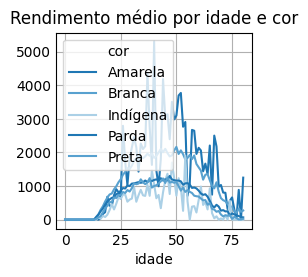

In [273]:
total_redimentos_2 = df_4.pivot_table('rendimento_bruto',index='idade',columns='cor',aggfunc='mean',fill_value=0).plot(title='Rendimento médio por idade e cor')

In [274]:
df_4_temp_2 = df_4[~ df_4['cor'].isin(["Amarela","Indígena"])]

<Axes: title={'center': 'Rendimento médio por idade e cor'}, xlabel='idade'>

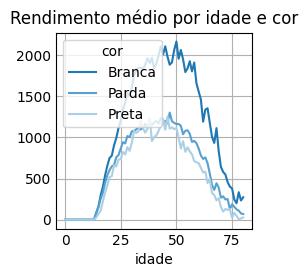

In [275]:
df_4_temp_2.pivot_table('rendimento_bruto',index='idade',columns='cor',aggfunc='mean',fill_value=0).plot(title='Rendimento médio por idade e cor')

# Visualização de dados por estado

In [276]:
df_4["regiao"] = df_4["uf"].apply(lambda x: "Sudeste" if x in ["São Paulo","Rio de Janeiro","Minas Gerais","Espírito Santo"] else "Sul" if x in ["Paraná","Santa Catarina","Rio Grande do Sul"] else "Centro-Oeste" if x in ["Mato Grosso","Mato Grosso do Sul","Goiás","Distrito Federal"] else "Nordeste" if x in ["Bahia","Sergipe","Alagoas","Pernambuco","Paraíba","Rio Grande do Norte","Ceará","Piauí","Maranhão"] else "Norte")

In [277]:
total_estado = df_4.pivot_table('rendimento_bruto',index='idade',columns='regiao',aggfunc='sum',fill_value=0)

In [278]:
total_estado

regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
idade,,,,,
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
76,12128.0,33599.0,30188.0,79532.0,31336.0
77,15270.0,22401.0,12168.0,67078.0,12765.0
78,22214.0,41750.0,2000.0,86264.0,25608.0


In [279]:
filtro = total_estado[["Sudeste","Sul","Centro-Oeste","Nordeste","Norte"]]

array([<Axes: xlabel='idade'>, <Axes: xlabel='idade'>,
       <Axes: xlabel='idade'>, <Axes: xlabel='idade'>,
       <Axes: xlabel='idade'>], dtype=object)

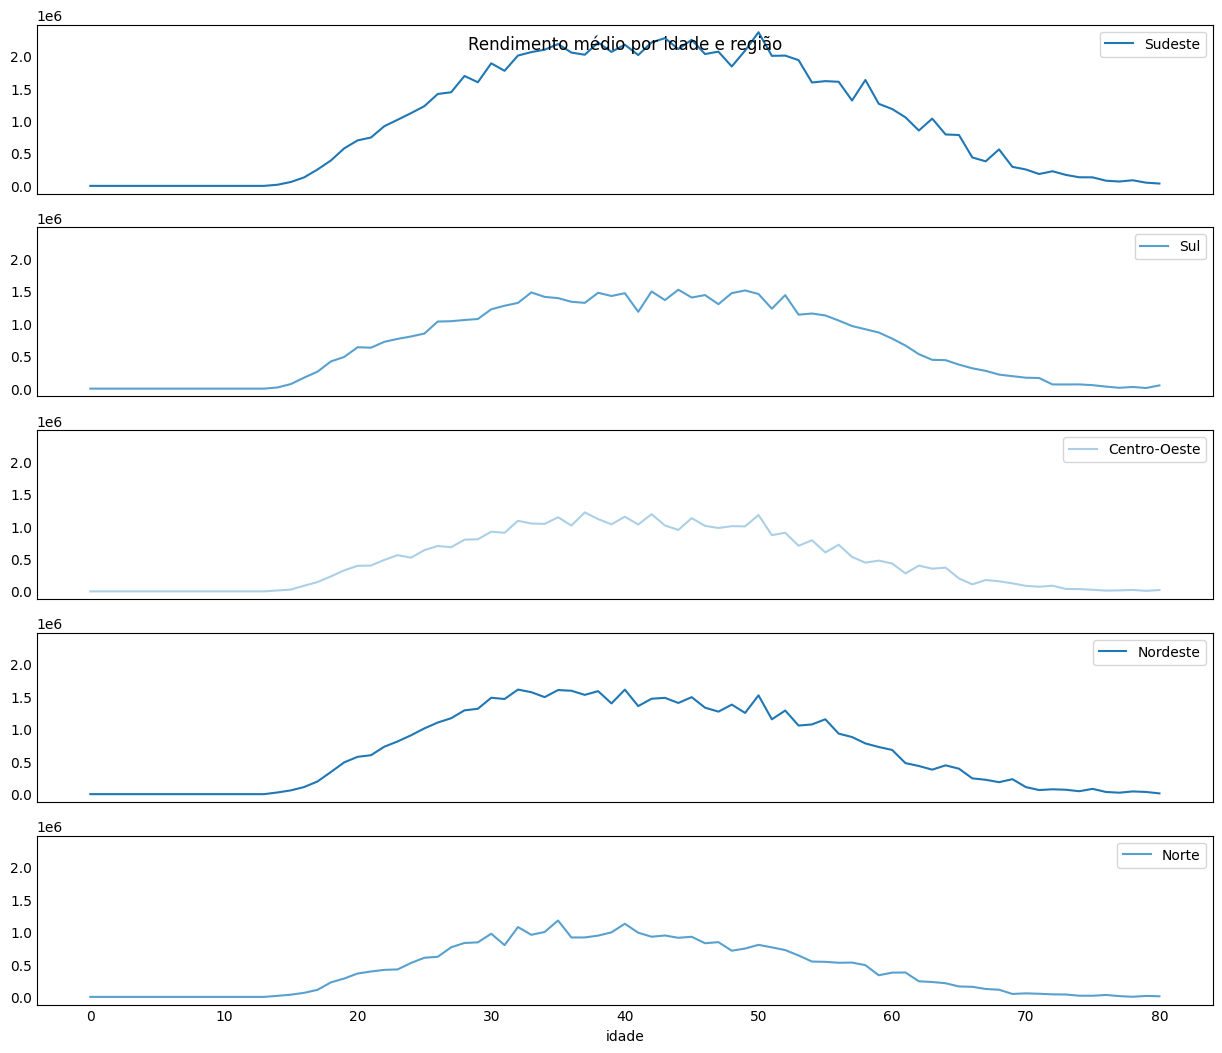

In [280]:
filtro.plot(subplots=True,figsize=(12,10),grid=False,title='Rendimento médio por idade e região',sharey=True)

# Anos de Estudo

In [287]:
df_4

,uf,sexo,idade,cor,rendimento_bruto,valor_benef_pensao_previdencia,anos_de_estudo,renda_total,regiao
0,Rondônia,Feminino,38,Parda,1000.0,0.0,12,1000.0,Norte
1,Rondônia,Masculino,24,Parda,740.0,0.0,12,740.0,Norte
2,Rondônia,Feminino,22,Branca,740.0,0.0,8,740.0,Norte
3,Rondônia,Masculino,17,Parda,0.0,0.0,5,0.0,Norte
4,Rondônia,Feminino,27,Parda,0.0,0.0,12,0.0,Norte
...,...,...,...,...,...,...,...,...,...
459264,Distrito Federal,Masculino,52,Parda,1000.0,0.0,6,1000.0,Centro-Oeste
459265,Distrito Federal,Feminino,35,Parda,0.0,0.0,0,0.0,Centro-Oeste
459266,Distrito Federal,Feminino,25,Parda,0.0,0.0,0,0.0,Centro-Oeste
459267,Distrito Federal,Masculino,75,Branca,0.0,0.0,9,0.0,Centro-Oeste


In [315]:
# Visualização de dados por estado

dados_agrupados = df_4.pivot_table('rendimento_bruto',index='anos_de_estudo',columns='cor',aggfunc='mean',fill_value=0)

In [316]:
dados_agrupados

cor,Amarela,Branca,Indígena,Parda,Preta
anos_de_estudo,,,,,
0,3001.480861,2705.274926,494.670968,1289.656778,904.955497
2,282.000000,327.918848,160.950000,328.290456,268.763298
3,110.344828,399.646937,230.835821,380.334637,321.881159
4,371.535714,514.931738,309.576923,470.848676,391.558848
5,480.863158,869.795579,378.827957,635.455057,521.948883
6,325.212121,855.051198,305.416667,624.451775,532.908102
7,147.722222,778.642421,316.666667,627.088510,515.429860
8,710.666667,897.565547,429.608696,660.007588,548.557564
9,645.950495,1063.158294,503.970588,826.564100,727.281573


In [318]:
x = dados_agrupados.index.values

In [325]:
y_1 = dados_agrupados["Amarela"].values
y_2 = dados_agrupados["Branca"].values
y_3 = dados_agrupados["Indígena"].values
y_4 = dados_agrupados["Parda"].values
y_5 = dados_agrupados["Preta"].values

In [326]:
y = np.vstack([y_1,y_2,y_3,y_4,y_5])

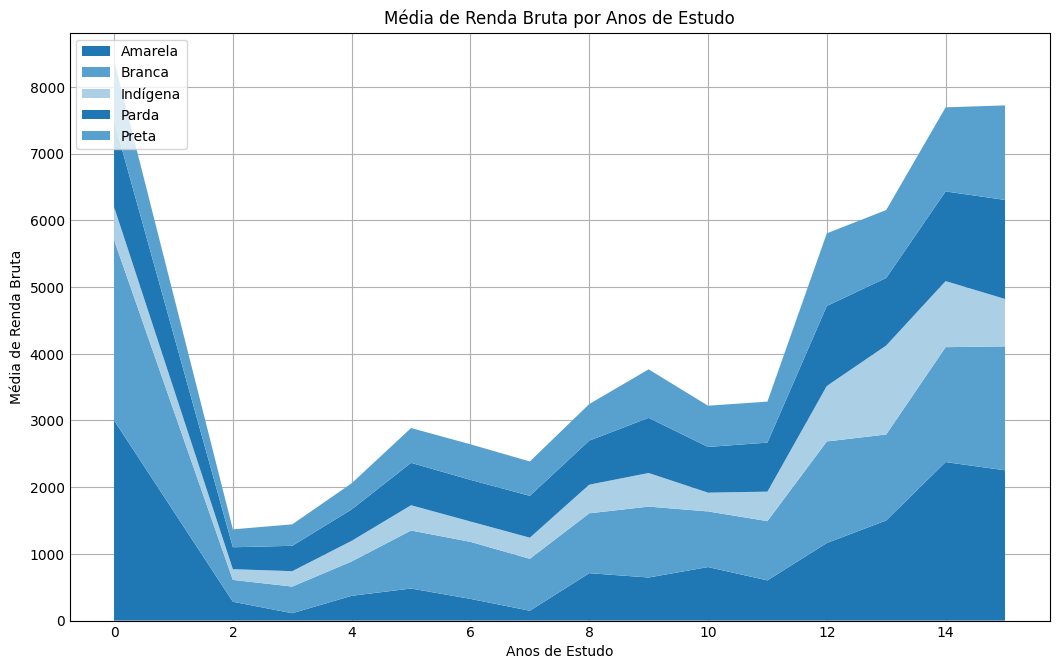

In [330]:
# Criar o stack plot
plt.figure(figsize=(10, 6))  # Ajustar o tamanho conforme necessário
plt.stackplot(x, y, labels=['Amarela','Branca','Indígena','Parda','Preta'])
plt.title('Média de Renda Bruta por Anos de Estudo')
plt.xlabel('Anos de Estudo')
plt.ylabel('Média de Renda Bruta')
plt.legend(loc='upper left')

plt.show()

# Proporção de renda entre homens e mulheres ao longo das idades

In [ ]:
filtro = top_10_estados[["Sudeste","Sul","Centro-Oeste","Nordeste","Norte"]]

In [337]:
agrup_renda_mensal = df_4.groupby('idade')['rendimento_bruto'].mean().round(2)

In [338]:
agrup_beneficio = df_4.groupby('idade')['valor_benef_pensao_previdencia'].mean().round(2)    

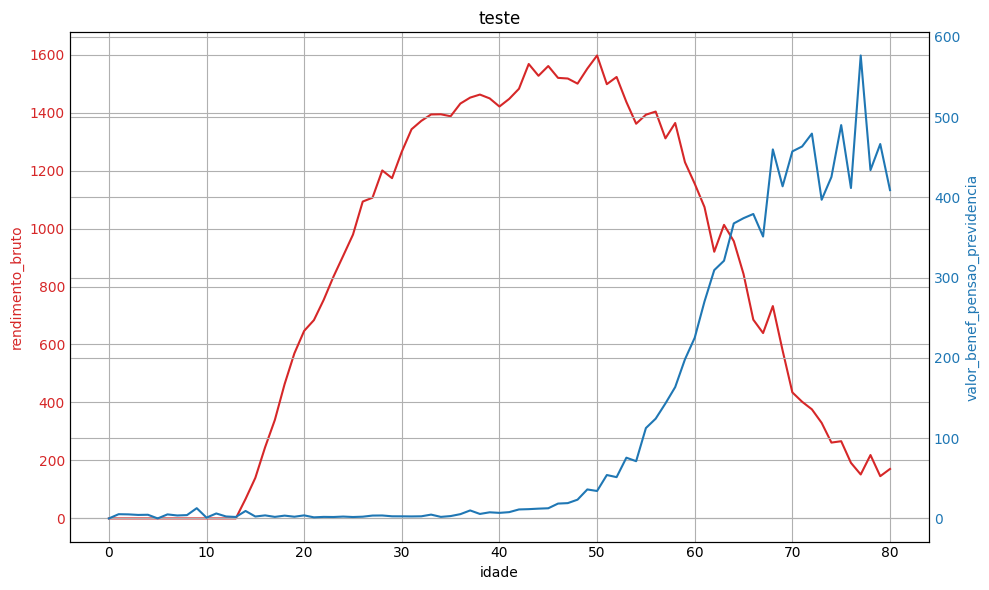

In [347]:
fig,ax = plt.subplots(figsize=(10,6))

color = 'tab:red'
ax.set_xlabel('idade')
ax.set_ylabel('rendimento_bruto',color=color)
ax.plot(agrup_renda_mensal.index, agrup_renda_mensal.values,color=color)
ax.tick_params(axis='y',labelcolor=color)

ax2 = ax.twinx()
color = 'tab:blue'
ax2.set_ylabel('valor_benef_pensao_previdencia',color=color)
ax2.plot(agrup_beneficio.index,agrup_beneficio.values,color=color)
ax2.tick_params(axis='y',labelcolor=color)  

plt.title("teste")
fig.tight_layout()
plt.show()

idade
0       0.00
1       5.27
2       5.06
3       4.38
4       4.58
       ...  
76    411.71
77    576.85
78    434.02
79    466.51
80    409.08
Name: valor_benef_pensao_previdencia, Length: 81, dtype: float64